CNN starts from here, mostly we can say that it is used for image preprocessing

Steps in cnn
1. Input img comes
2. then we apply feature detector/filter
3. we get feature map from it(image is reduced)
4. there are many types of feature detectors which are applied to same img so we get many feature maps for a same image
5. now we have many feature maps we apply the activation function to it which is 'relu'
6. this is done bcoz we want more non linearity
7. this gives us the convolutional layer, it is the first step
8. now we apply max pooling with a square matrix such as 2*2 , which reduces the size of the feature map more
9. this helps us to prevent overfiting 
10. now pooling can be of many types such as max,avg,sum pooling and many more
11. the third step is of flattening
12. it is very simple, as we just convert the 2d matrix into a 1d matrix and give it to our perceptron(future cnn model which is similiar to ann)
13. the first layer of the model has the same no of neurons as the no of elements of the 1d layer
14. there is full connection in the hidden layers
15. the output layer is again same as the ann model here
16. the last hidden layer has the probability, here neurons has different probabilities and the output layer neurons are activated by this activation of the hidden layer neurons they are trained in such a way that they will be activated only if there particular hidden layer neurons give them the required probability
17. cross entropy function is used only for classification
18. softmax for regression
19. mse is calcualted for regression
20. cross entropy is another way of loss function like we have cost function for ann
21. it is H(p,q)= sigma(p(x)log(q(x)))   p is the final probability(0/1)  q is the probability for x such as 0.9
22. so we have to minimize it

Here we will be classifying cats and dogs pictures , our model will tell wether they are cats or dogs
if possible i would try to make its gui also

importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data preprocessing

we have to avoid overfitting, therfore transformation :Image Augmentation

In [2]:
# this is the augmentation configuration we will use for training
train_datagenerator = ImageDataGenerator(
        rescale=1./255,  #for standardisation
        shear_range=0.2,    
        zoom_range=0.2,
        horizontal_flip=True)
#taken from keras documentation

creating the training set, we will apply the transformation of the object of train_datagenerator here

In [3]:
train_set = train_datagenerator.flow_from_directory(
        './cnn_dataset/dataset/training_set',  # this is the target directory(training set)
        target_size=(64, 64),  # all images will be resized to 64*64
        batch_size=32,         #our batch size is 32
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels


Found 8000 images belonging to 2 classes.


in our training data set there are two classes dogs and cat , each have 4000 pics each

Let's prepare the test set,first test datagenerator

In [4]:
test_datagenerator=ImageDataGenerator(rescale=1./255)   #here we are only rescaling(standardising) the image and nothing else
#we don't know in future what kind of images we will be getting

now test set

In [5]:
test_set = test_datagenerator.flow_from_directory(
        './cnn_dataset/dataset/test_set',  # this is the target directory(test set)
        target_size=(64, 64),  # all images will be resized to 64*64
        batch_size=32,         #our batch size is 32
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels
#test set will be loaded

Found 2000 images belonging to 2 classes.


data preprocessing is done , we have splitted the training and test set according to our need

now let's build the cnn

1. Convolutional layer

In [6]:
cnn=tf.keras.models.Sequential()   #initialise the cnn as the sequence of layers

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

'''
here filter means no of filter we will apply (the feature detectors) it is 32
kernel size is 3 which means the size of teh feature detectors is 3*3 matrix
activation function is relu which means rectifier activation function
and the input size is 64,64 and 3 for coloured (r,g,b)
'''

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


'\nhere filter means no of filter we will apply (the feature detectors) it is 32\nkernel size is 3 which means the size of teh feature detectors is 3*3 matrix\nactivation function is relu which means rectifier activation function\nand the input size is 64,64 and 3 for coloured (r,g,b)\n'

2. Pooling (max pooling)

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#we did not added the third argument
#pool size 2*2 matrix, stride means 2 pixels se shift krna matrix/window ko

now again add a second convolutional layer, same but don't do input shape this time

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


3. Flattening

In [10]:
#we will convert them into 2d matrix
cnn.add(tf.keras.layers.Flatten())   #1d bana diya

4. full connection (ab vhi ann wala part)

In [11]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))  #pehla hidden layer mai 128 neurons

5. Output layer, units=1, activation='sigmoid'

In [12]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

Compile the cnn

In [13]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#vhi sab adam for stochastic gradient,loss function is binary cross entropy and our metrics is accuracy


training and testing at the same time, here epochs are not 100 lets do 25

In [14]:
cnn.fit(train_set,validation_data=test_set,epochs=25)

Epoch 1/25


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 29s 108ms/step - accuracy: 0.5411 - loss: 0.6867 - val_accuracy: 0.6480 - val_loss: 0.6288
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.6819 - loss: 0.5965 - val_accuracy: 0.7415 - val_loss: 0.5413
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.7214 - loss: 0.5520 - val_accuracy: 0.7310 - val_loss: 0.5281
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.7318 - loss: 0.5341 - val_accuracy: 0.7355 - val_loss: 0.5364
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.7392 - loss: 0.5213 - val_accuracy: 0.7540 - val_loss: 0.5048
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.7672 - loss: 0.4881 - val_accuracy: 0.7520 - val_loss: 0.5002
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.7711 - loss: 0.4730 - val_accuracy: 0.7730 - val_loss: 0.4810
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.7778 - loss: 0.4584 - val_accura

Making a single prediction

In [15]:
from keras.preprocessing import image

In [46]:
test_image=image.load_img('C:/Users/LENOVO/Desktop/aiml/UDEMY/machine/cnn_dataset/dataset/test_set/cats/cat.4008.jpg'
,target_size=(64,64))  #pil format

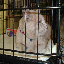

In [47]:
test_image

In [48]:
test_image=image.img_to_array(test_image)
#we converted the image from pil format to array format
#but remember while training we did batches of 32 , and here is only 1 img
#that's why we will expand this array by adding fake dimensions, and it will be in 1D only
#as images go for training in form of row by row
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [49]:
print(result)

[[1.]]


In [50]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [51]:
if (result[0][0]>=0.5):
    print("dog")
else:
    print("cat")

dog
